# Example of upper limit computation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lauztat
from lauztat.parameters import POI
from lauztat.hypotests import UpperLimit
from lauztat.calculators import AsymptoticCalculator
from lauztat.config import Config

In [2]:
import tensorflow as tf
import zfit
from zfit import ztf
from zfit.core.loss import ExtendedUnbinnedNLL, UnbinnedNLL
from zfit.minimizers.minimizer_minuit import MinuitMinimizer

## Scenario

Let's assume you want to find a resonnance between 0.1 and 3.0 GeV/c$^2$ of invariant mass of a system.

You have a signal region and a background only region:

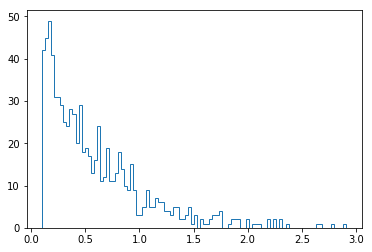

In [3]:
bounds = (0.1, 3.0)

#background only
np.random.seed(10)
tau = 2.0
beta = 1./tau
data = np.random.exponential(beta, 1000)

data_bkg = data[(data > bounds[0]) & (data < bounds[1])]
plt.hist(data_bkg, bins=100, histtype='step');

In [4]:
#signal + background

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 10)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

### Background fit, in background only region:

The background model is an exponential.

In [5]:
obs = zfit.Space('x', limits=bounds)

In [6]:
lambda_ = zfit.Parameter("lambda_",-2.0, -4.0, -0.5)
model_bkg = zfit.pdf.Exponential(obs=obs, lambda_=lambda_)

In [7]:
data_bkg_ = zfit.data.Data.from_numpy(obs=obs, array=data_bkg)
nll_bkg = UnbinnedNLL(model=[model_bkg], data=[data_bkg_], fit_range=[obs]) 

In [8]:
minimizer = MinuitMinimizer()

In [9]:
min_bkg = minimizer.minimize(loss=nll_bkg)

FCN = 222.3887201920576 
 TOTAL NCALL = 18 
 NCALLS = 18 
 
 
 EDM = 7.000513472127701e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,lambda_,-2.02215,0.0748428,,,-4,-0.5,No


In [10]:
min_bkg.params[lambda_]

{'value': -2.022148383099551}

In [11]:
min_bkg.error();

Error,-0.07588040251832025,0.07423887392248027
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


In [12]:
lambda_mu = min_bkg.params[lambda_]["value"]
lambda_sigma = 0.0748696
print(lambda_mu, lambda_sigma)

-2.022148383099551 0.0748696


### Signal + background fit in signal region:

The total model is a sum of a gaussian and an exponential. The tau parameter of the exponential will be constrained to the value obtained in the background only region.

In [13]:
mean = zfit.Parameter("mean", 1.2, 0.1, 2., floating=False)
sigma = zfit.Parameter("sigma", 0.1, floating=False)
Nsig = zfit.Parameter("Nsig", 1., -20., len(data))
Nbkg = zfit.Parameter("Nbkg", len(data), 0., len(data)*1.1)

In [14]:
signal = Nsig * zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)
background =  Nbkg * model_bkg
tot_model = signal + background

In [15]:
constraint = zfit.constraint.nll_gaussian(params=[lambda_], mu=[lambda_mu], sigma=[lambda_sigma])

In [16]:
data_ = zfit.data.Data.from_numpy(obs=obs, array=data)
nll = ExtendedUnbinnedNLL(model=[tot_model], data=[data_], fit_range=[obs], constraints=constraint) 

In [17]:
minimum = minimizer.minimize(loss=nll)

FCN = -1077.310240591382 
 TOTAL NCALL = 68 
 NCALLS = 68 
 
 
 EDM = 3.598703848654511e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,lambda_,-2.00252,0.0665315,,,-4,-0.5,No
1,Nbkg,250.489,16.4979,,,0,281.6,No
2,Nsig,5.54888,5.48929,,,-20,256,No


In [18]:
def plotfitresult(pdf, bounds, nbins, data):
    x = np.linspace(*bounds, num=1000)
    pdf = zfit.run(tot_model.pdf(x, norm_range=bounds))
    _ = plt.plot(x, ((bounds[1] - bounds[0])/nbins)*(pdf), "-r")  

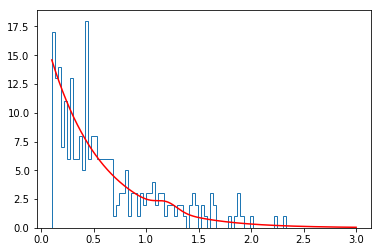

In [19]:
nbins = 100
plt.hist(data, bins=nbins, histtype='step', range=bounds);
plotfitresult(tot_model, bounds, nbins, data)

## Upper limit:

In [20]:
def lossbuilder(model, data):
    constraint = zfit.constraint.nll_gaussian(params=[lambda_], mu=[lambda_mu], sigma=[lambda_sigma])
    loss = ExtendedUnbinnedNLL(model=model, data=data, fit_range=[obs], constraints=constraint) 
    return loss

config = Config(tot_model, data_, lossbuilder, MinuitMinimizer())

In [21]:
config.bestfit

Get fit best values!


FCN = -1077.3102440274733 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 3.255572279018984e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,lambda_,-2.00246,0.0665314,,,-4,-0.5,No
1,Nbkg,250.489,16.498,,,0,281.6,No
2,Nsig,5.54888,5.48985,,,-20,256,No


In [22]:
calc = AsymptoticCalculator(config)

In [23]:
poinull = POI(Nsig, value=np.linspace(0.0, 25, 10))
poialt = POI(Nsig, value=0)
ul_test = UpperLimit(poinull, poialt, calc, CLs=True, qtilde=False)

In [24]:
ul_test.upperlimit();

Compute qobs for the null hypothesis!

Get fit best values for nuisance parameters for the alternative hypothesis!


FCN = -1076.7139454782166 
 TOTAL NCALL = 48 
 NCALLS = 48 
 
 
 EDM = 7.668596992493037e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,lambda_,-1.9881,0.0650271,,,-4,-0.5,No
1,Nbkg,255.99,15.8857,,,0,281.6,No


0


NotImplementedError: 

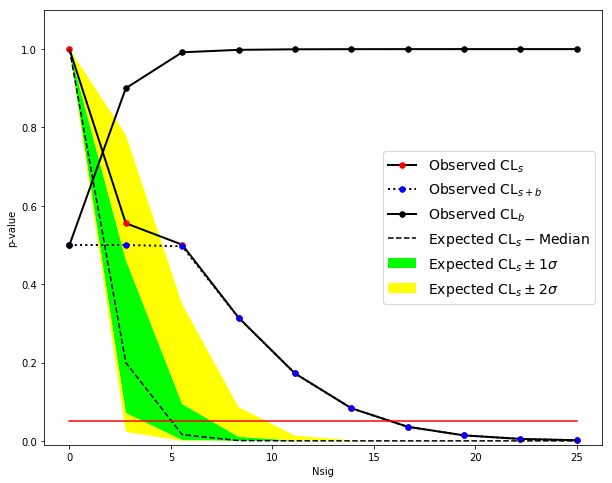

In [25]:
ul_test.plot()

In [26]:
asy = calc.asymov_dataset(poialt)[0]

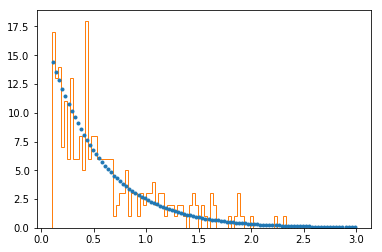

In [27]:
plt.plot(asy[0], asy[1], '.')
plt.hist(data, bins=100, histtype='step', range=bounds);

In [28]:
def profileLikelihood(minimizer, loss, var, value):
    with var.set_value(value) as value:
        var.floating = False
        minimum = minimizer.minimize(loss=loss)
    var.floating = True
    return minimum.fmin

In [29]:
loss_asy = calc.asymov_loss(poialt)

In [30]:
nll = []
ns = np.linspace(0, 15 , 15)

for n in ns:
    minimizer.verbosity = 0
    nll.append(profileLikelihood(minimizer, loss_asy, Nsig, n))
    minimizer.verbosity = 5

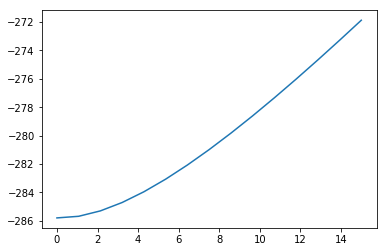

In [31]:
plt.plot(ns, nll)

In [32]:
calc._asymov_nll

{POI('Nsig', value=0.0): -285.79448579483085,
 POI('Nsig', value=2.7777777777777777): -284.97227649875197,
 POI('Nsig', value=5.555555555555555): -282.89115908839125,
 POI('Nsig', value=8.333333333333332): -280.0946777176164,
 POI('Nsig', value=11.11111111111111): -276.8606689852848,
 POI('Nsig', value=13.88888888888889): -273.34439043885436,
 POI('Nsig', value=16.666666666666664): -269.6391145288029,
 POI('Nsig', value=19.444444444444443): -265.8041181688187,
 POI('Nsig', value=22.22222222222222): -261.87876062776115,
 POI('Nsig', value=25.0): -257.89010038240275}

In [33]:
d = loss_asy.data[0]

In [34]:
zfit.run(d.weights)

array([14.38472743, 13.57883357, 12.81808932, 12.09996521, 11.42207348,
       10.78216014, 10.17809748,  9.60787699,  9.06960269,  8.56148481,
        8.08183386,  7.62905501,  7.20164277,  6.79817598,  6.41731313,
        6.05778784,  5.71840469,  5.39803524,  5.09561425,  4.81013618,
        4.54065181,  4.2862651 ,  4.04613022,  3.81944873,  3.6054669 ,
        3.40347324,  3.21279613,  3.03280157,  2.86289108,  2.70249969,
        2.55109412,  2.40817093,  2.27325491,  2.14589746,  2.02567512,
        1.91218815,  1.8050592 ,  1.70393207,  1.60847052,  1.51835713,
        1.43329228,  1.35299313,  1.27719267,  1.20563889,  1.13809385,
        1.07433297,  1.01414425,  0.95732755,  0.90369398,  0.85306518,
        0.80527283,  0.760158  ,  0.7175707 ,  0.67736933,  0.63942021,
        0.60359716,  0.56978106,  0.5378595 ,  0.50772631,  0.47928131,
        0.45242993,  0.42708287,  0.40315586,  0.38056935,  0.35924823,
        0.33912161,  0.32012257,  0.30218794,  0.28525808,  0.26

In [35]:
zfit.run(d)

array([[0.1145],
       [0.1435],
       [0.1725],
       [0.2015],
       [0.2305],
       [0.2595],
       [0.2885],
       [0.3175],
       [0.3465],
       [0.3755],
       [0.4045],
       [0.4335],
       [0.4625],
       [0.4915],
       [0.5205],
       [0.5495],
       [0.5785],
       [0.6075],
       [0.6365],
       [0.6655],
       [0.6945],
       [0.7235],
       [0.7525],
       [0.7815],
       [0.8105],
       [0.8395],
       [0.8685],
       [0.8975],
       [0.9265],
       [0.9555],
       [0.9845],
       [1.0135],
       [1.0425],
       [1.0715],
       [1.1005],
       [1.1295],
       [1.1585],
       [1.1875],
       [1.2165],
       [1.2455],
       [1.2745],
       [1.3035],
       [1.3325],
       [1.3615],
       [1.3905],
       [1.4195],
       [1.4485],
       [1.4775],
       [1.5065],
       [1.5355],
       [1.5645],
       [1.5935],
       [1.6225],
       [1.6515],
       [1.6805],
       [1.7095],
       [1.7385],
       [1.7675],
       [1.7965

In [36]:
minimizer.minimize(loss=loss_asy)

FCN = -285.79726785516107 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 5.812234787766174e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,lambda_,-2.01464,0.0663518,,,-4,-0.5,No
1,Nbkg,99.8365,10.1491,,,0,281.6,No
2,Nsig,0.143104,1.86044,,,-20,256,No


In [37]:
d.nevents

<tf.Tensor 'strided_slice_15:0' shape=() dtype=int32>

In [38]:
zfit.run(tot_model.get_yield())

99.97963501897378

In [39]:
zfit.run(d.weights).sum()

255.9541988323644

In [40]:
zfit.run(d.weights)

array([14.38472743, 13.57883357, 12.81808932, 12.09996521, 11.42207348,
       10.78216014, 10.17809748,  9.60787699,  9.06960269,  8.56148481,
        8.08183386,  7.62905501,  7.20164277,  6.79817598,  6.41731313,
        6.05778784,  5.71840469,  5.39803524,  5.09561425,  4.81013618,
        4.54065181,  4.2862651 ,  4.04613022,  3.81944873,  3.6054669 ,
        3.40347324,  3.21279613,  3.03280157,  2.86289108,  2.70249969,
        2.55109412,  2.40817093,  2.27325491,  2.14589746,  2.02567512,
        1.91218815,  1.8050592 ,  1.70393207,  1.60847052,  1.51835713,
        1.43329228,  1.35299313,  1.27719267,  1.20563889,  1.13809385,
        1.07433297,  1.01414425,  0.95732755,  0.90369398,  0.85306518,
        0.80527283,  0.760158  ,  0.7175707 ,  0.67736933,  0.63942021,
        0.60359716,  0.56978106,  0.5378595 ,  0.50772631,  0.47928131,
        0.45242993,  0.42708287,  0.40315586,  0.38056935,  0.35924823,
        0.33912161,  0.32012257,  0.30218794,  0.28525808,  0.26